#### Import the necessary packages 
Install the necessary dependencies Packages: netcdf4 (conda install netcdf4) and h5netcdf (conda install h5netcdf)

In [58]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, glob
%matplotlib inline

In [44]:
# import the dataset netCDF files
ds=xr.open_dataset('L:/SoilMoisture_NLDAS2_Dataset_Preprocess/CN_SM/spatial-effects-networks-master/NCALDAS_NOAH0125_D.A19790102.002.nc4')
ds.data_vars
# for v in ds:
#     print(v)

Data variables: (12/43)
    time_bnds           (time, bnds) datetime64[ns] ...
    SWnet               (time, lat, lon) float32 ...
    LWnet               (time, lat, lon) float32 ...
    Qle                 (time, lat, lon) float32 ...
    Qh                  (time, lat, lon) float32 ...
    Qg                  (time, lat, lon) float32 ...
    ...                  ...
    Tair_f_min          (time, lat, lon) float32 ...
    Tair_f_max          (time, lat, lon) float32 ...
    Qair_f              (time, lat, lon) float32 ...
    Psurf_f             (time, lat, lon) float32 ...
    SWdown_f            (time, lat, lon) float32 ...
    LWdown_f            (time, lat, lon) float32 ...

In [53]:
SM1.attrs #attributes

{'units': 'm^3 m-3',
 'standard_name': 'volumetric_soil_moisture',
 'long_name': 'Soil moisture',
 'cell_methods': 'time: mean',
 'vmin': 0.09632354,
 'vmax': 0.47590914}

In [41]:
SM1=ds.SoilMoist0_10cm

print(f'Shape of the dataset {ds.SoilMoist0_10cm.shape}')
print(type(ds.SoilMoist0_10cm))
SM1

Shape of the dataset (1, 224, 464)
<class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray 'SoilMoist0_10cm' (time: 1, lat: 224, lon: 464)>
[103936 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * lat      (lat) float32 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * time     (time) datetime64[ns] 1979-01-02
Attributes:
    units:          m^3 m-3
    standard_name:  volumetric_soil_moisture
    long_name:      Soil moisture
    cell_methods:   time: mean
    vmin:           0.09632354
    vmax:           0.47590914

In [38]:
#isel operator
SM1.isel(lon=[0,12,123]) # for selecteing particular latitude/longitude/time values
# sel operation for selecting regions bound by lats and lon
cc=SM1.sel(lon=slice(-120,-100),lat=slice(30,35))

<xarray.DataArray 'SoilMoist0_10cm' (time: 1, lat: 40, lon: 160)>
array([[[     nan,      nan, ..., 0.307187, 0.308637],
        [     nan,      nan, ..., 0.307434, 0.309748],
        ...,
        [0.228594, 0.242514, ..., 0.224148, 0.230743],
        [0.220841, 0.208777, ..., 0.146862, 0.296956]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -119.9 -119.8 -119.7 -119.6 ... -100.3 -100.2 -100.1
  * lat      (lat) float32 30.06 30.19 30.31 30.44 ... 34.56 34.69 34.81 34.94
  * time     (time) datetime64[ns] 1979-01-02
Attributes:
    units:          m^3 m-3
    standard_name:  volumetric_soil_moisture
    long_name:      Soil moisture
    cell_methods:   time: mean
    vmin:           0.09632354
    vmax:           0.47590914

In [40]:
# these operations can be chained e.g. want to select the first day of thise particular region
SM1.isel(time=0).sel(lon=slice(-120,-100),lat=slice(30,35))

<xarray.DataArray 'SoilMoist0_10cm' (lat: 40, lon: 160)>
array([[     nan,      nan,      nan, ..., 0.30713 , 0.307187, 0.308637],
       [     nan,      nan,      nan, ..., 0.30631 , 0.307434, 0.309748],
       [     nan,      nan,      nan, ..., 0.281153, 0.30625 , 0.309427],
       ...,
       [0.28829 , 0.239537, 0.2452  , ..., 0.288238, 0.292421, 0.256227],
       [0.228594, 0.242514, 0.228269, ..., 0.143994, 0.224148, 0.230743],
       [0.220841, 0.208777, 0.192178, ..., 0.145453, 0.146862, 0.296956]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -119.9 -119.8 -119.7 -119.6 ... -100.3 -100.2 -100.1
  * lat      (lat) float32 30.06 30.19 30.31 30.44 ... 34.56 34.69 34.81 34.94
    time     datetime64[ns] 1979-01-02
Attributes:
    units:          m^3 m-3
    standard_name:  volumetric_soil_moisture
    long_name:      Soil moisture
    cell_methods:   time: mean
    vmin:           0.09632354
    vmax:           0.47590914

## Plotting
Xarrya will automatically guess the type of diagram

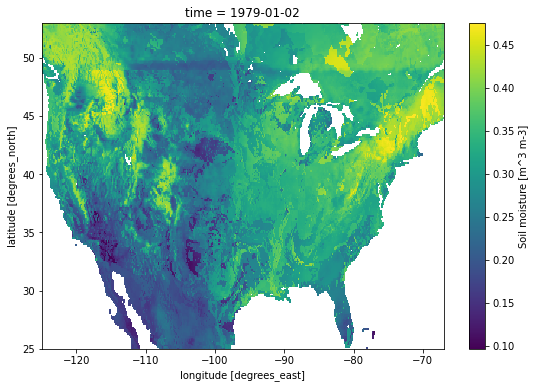

In [55]:
SM1.isel(time=0).plot(size=6)

### Working with Glob and os

In [107]:
def date_range(x):
    return(x[-16:-8])
folder='K:/sm_nldas_data/'
# file=os.listdir(folder)[0]
file1=glob.glob(os.path.join(folder,'*.nc4'))
file=sorted(file,key=date_range)[:7]
SM1_10=xr.merge([xr.open_dataset(os.path.join(folder,f)) for f in file]).SoilMoist0_10cm # using list comprehension
SM1_10

<xarray.DataArray 'SoilMoist0_10cm' (time: 30, lat: 224, lon: 464)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.3951723 , 0.39599213, 0.38999555, ..., 0.4000819 ,
         0.3918417 , 0.3699962 ],
        [0.39947924, 0.39118093, 0.40467313, ..., 0.40119272,
         0.38964623, 0.3745999 ],
        [0.43132454, 0.43212882, 0.42203805, ..., 0.40163314,
         0.40224966, 0.3788558 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.39423376, 0.39522943, 0.38927335, ..., 0.4224624 ,
         0.40571654, 0.38598716],
        [0.39876774, 0.39055538, 0.40364933, ..., 0.4112715 ,
         0.39762947, 0.39070442],
        [0.43715772, 0.4333887 , 0.42166382, ..., 0.42189258,
         0.42126256, 0.3990172 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.3943523 , 0.39515293, 0.38918558, ..., 0.42760837,
         0.40930328, 0.39043182],
        [0.3986882 , 0.39047724, 0.40376657, ..., 0.4149509 ,
         0.40104032, 0.3944412 ],
        [0.4369821 , 0.43331382, 0.42157522, ..., 0.42684746,
         0.42615166, 0.40358838]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-02 1979-01-03 ... 1979-01-31
  * lon      (lon) float32 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * lat      (lat) float32 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
Attributes:
    units:          m^3 m-3
    standard_name:  volumetric_soil_moisture
    long_name:      Soil moisture
    cell_methods:   time: mean
    vmin:           0.09632354
    vmax:           0.47590914

<xarray.DataArray 'time' (time: 30)>
array(['1979-01-02T00:00:00.000000000', '1979-01-03T00:00:00.000000000',
       '1979-01-04T00:00:00.000000000', '1979-01-05T00:00:00.000000000',
       '1979-01-06T00:00:00.000000000', '1979-01-07T00:00:00.000000000',
       '1979-01-08T00:00:00.000000000', '1979-01-09T00:00:00.000000000',
       '1979-01-10T00:00:00.000000000', '1979-01-11T00:00:00.000000000',
       '1979-01-12T00:00:00.000000000', '1979-01-13T00:00:00.000000000',
       '1979-01-14T00:00:00.000000000', '1979-01-15T00:00:00.000000000',
       '1979-01-16T00:00:00.000000000', '1979-01-17T00:00:00.000000000',
       '1979-01-18T00:00:00.000000000', '1979-01-19T00:00:00.000000000',
       '1979-01-20T00:00:00.000000000', '1979-01-21T00:00:00.000000000',
       '1979-01-22T00:00:00.000000000', '1979-01-23T00:00:00.000000000',
       '1979-01-24T00:00:00.000000000', '1979-01-25T00:00:00.000000000',
       '1979-01-26T00:00:00.000000000', '1979-01-27T00:00:00.000000000',
       '1979-01-28T00:00:00.000000000', '1979-01-29T00:00:00.000000000',
       '1979-01-30T00:00:00.000000000', '1979-01-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-02 1979-01-03 ... 1979-01-31
Attributes:
    long_name:       time
    time_increment:  1
    begin_date:      19790102
    begin_time:      000000
    end_date:        19790103
    end_time:        000000
    bounds:          time_bnds

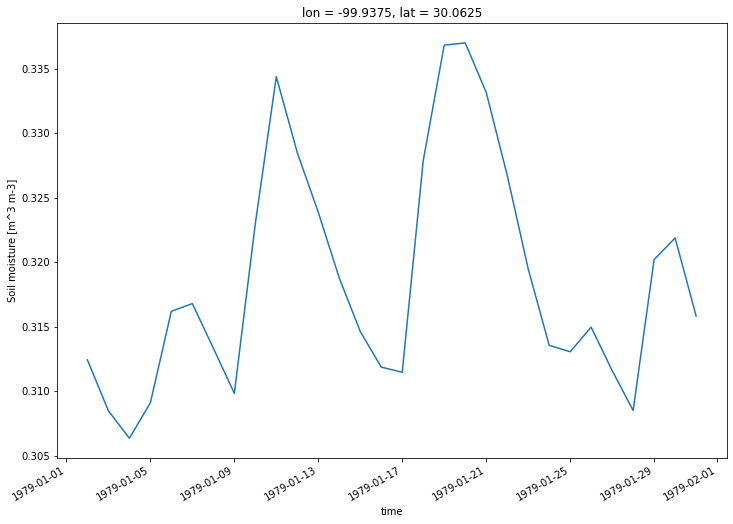

In [118]:
SM1_10.sel(time=slice('1979-01-02','1979-01-31')).sel(lon=-100,lat=30,method='nearest').plot(size=8)# time series plot

(array([  3102.,  13812.,  51235.,  80912.,  98453., 104840., 120701.,
         74695.,  47427.,  13599.]),
 array([0.09632354, 0.1342821 , 0.17224066, 0.21019922, 0.24815778,
        0.28611633, 0.3240749 , 0.36203346, 0.39999202, 0.43795058,
        0.47590914], dtype=float32),
 <BarContainer object of 10 artists>)

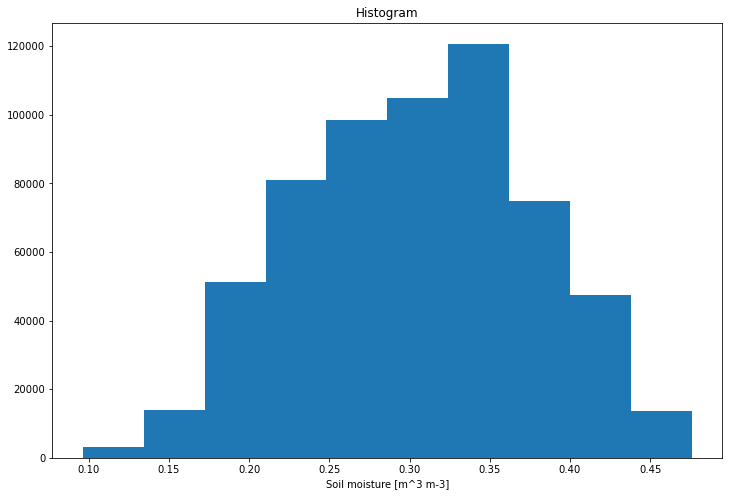

In [111]:
SM1_10.sel(time=slice('1979-01-02','1979-01-09')).plot(size=8) # for multiple time steps it plots a histogram

### Creating and Writing a Dataset to *.nc format

In [17]:
ds = xr.Dataset(
    {"rand_val": (("x", "y"), np.random.rand(4, 5))},
    coords={
        "x": [10, 20, 30, 40],
        "y": pd.date_range("2000-01-01", periods=5),
        "z": ("x", list("abcd")),
    },
)


ds.to_netcdf("saved_on_disk.nc")


array([[0.90593592, 0.83581699, 0.72362847, 0.2409906 , 0.13059226],
       [0.23642848, 0.17235573, 0.30976888, 0.36358205, 0.71876638],
       [0.38779707, 0.66429174, 0.52328085, 0.0358723 , 0.16294186],
       [0.5470657 , 0.43607242, 0.85719262, 0.33752307, 0.51348444]])